In [4]:
import numpy as np
import pandas as pd

In [5]:
# 读取鸢尾花数据集，header是标题行
data = pd.read_csv(r"Iris.csv", header=0);

In [6]:
data["Species"] = data["Species"].map({"Iris-versicolor": 2, "Iris-setosa":1, "Iris-virginica":0})
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,95,5.6,2.7,4.2,1.3,2
17,18,5.1,3.5,1.4,0.3,1
48,49,5.3,3.7,1.5,0.2,1
52,53,6.9,3.1,4.9,1.5,2
89,90,5.5,2.5,4.0,1.3,2
82,83,5.8,2.7,3.9,1.2,2
14,15,5.8,4.0,1.2,0.2,1
117,118,7.7,3.8,6.7,2.2,0
60,61,5.0,2.0,3.5,1.0,2
54,55,6.5,2.8,4.6,1.5,2


In [7]:
data.drop("Id", axis=1, inplace=True)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.count()

SepalLengthCm    147
SepalWidthCm     147
PetalLengthCm    147
PetalWidthCm     147
Species          147
dtype: int64

In [10]:
data["Species"].value_counts()

2    50
0    49
1    48
Name: Species, dtype: int64

In [57]:
class  KNN:
    '''使用Python实现K近邻分类'''
    
    def __init__(self, k):
        '''初始化方法
        
        Parameters
        ---
        k: int
            邻居的个数
        '''
        
        self.k = k
        
    def fit(self, X, y):
        '''训练的方法
        
        Parameters
        ----
        X：类数组类型，形状为：[样本数量，特征的数量]
            待训练的样本特征
            
        y：类数组类型形状为：[样本数量]
            每个样本的目标值（标签）
        '''
        
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        '''根据参数传递的样本，进而对样本数据进行预测
        
        Parameters:
        ----
        X：类数组类型，形状为：[样本数量，特征的数量]
            待训练的样本特征
            
        Returns
        -----
        result: 数组类型
            预测的结果
        '''
        X = np.asarray(X)
        result = []
        
        for x in X:
            # 使用欧式距离，向量减矩阵，ndarray支持广播
            # dis中得到测试集的每个点和训练点的每一个节点的距离
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis = 1))
            # 返回排序好的索引
            index = dis.argsort()
            # 取距离最近的k个索引
            index = index[:self.k]
            # 返回数组中每个元素出现的次数，元素必须是非负的整数
            count = np.bincount(self.y[index])
            # 返回nd_array中值最大的数字的索引
            result.append(count.argmax())
            
        return np.asarray(result)
    
    def weight_predict(self, X):
        '''根据参数传递的样本，进而对样本数据进行预测
        
        Parameters:
        ----
        X：类数组类型，形状为：[样本数量，特征的数量]
            待训练的样本特征
            
        Returns
        -----
        result: 数组类型
            预测的结果
        '''
        X = np.asarray(X)
        result = []
        
        for x in X:
            # 使用欧式距离，向量减矩阵，ndarray支持广播
            # dis中得到测试集的每个点和训练点的每一个节点的距离
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis = 1))
            # 返回排序好的索引
            index = dis.argsort()
            # 取距离最近的k个索引
            index = index[:self.k]
            # 返回数组中每个元素出现的次数，以距离的倒数为权重，元素必须是非负的整数
            weight = np.bincount(self.y[index], weights = 1/dis[index])
            # 返回nd_array中值最大的数字的索引
            result.append(weight.argmax())
            
        return np.asarray(result)

In [63]:
# 提取每个类别的鸢尾花的数据
t0 = data[data["Species"] == 0]
t1 = data[data["Species"] == 1]
t2 = data[data["Species"] == 2]
# 仅仅打乱了顺序
t0 = t0.sample(len(t0), random_state = 0)
t1 = t1.sample(len(t1), random_state = 0)
t2 = t2.sample(len(t2), random_state = 0)

train_X = pd.concat( [t0.iloc[:40, :-1], t1.iloc[:40,:-1], t2.iloc[:40,:-1] ], axis=0)
train_y = pd.concat( [t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1] ], axis=0)
test_X = pd.concat( [t0.iloc[40:, :-1], t1.iloc[40:,:-1], t2.iloc[40:,:-1] ], axis=0)
test_y = pd.concat( [t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1] ], axis=0)
#创建KNN对象
knn = KNN(k=3)
# 训练
knn.fit(train_X, train_y)
# 预测
# result = knn.predict(test_X)
result = knn.weight_predict(test_X)
# 结果
display(result == test_y)

121     True
119    False
109     True
139     True
146     True
103     True
100     True
148     True
145     True
21      True
19      True
9       True
41      True
47      True
3       True
0       True
46      True
86      True
71      True
69      True
59      True
89      True
96      True
53      True
50      True
97      True
94      True
Name: Species, dtype: bool

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [60]:
def dispFonts():
    #显示可用的中文字体，同时支持英文的
    from matplotlib.font_manager import FontManager
    import subprocess

    fm = FontManager()
    mat_fonts = set(f.name for f in fm.ttflist)

    output = subprocess.check_output(
        'fc-list :lang=zh -f "%{family}\n"', shell=True)
    output = output.decode('utf-8')
    # print ‘*‘ * 10, ‘系统可用的中文字体‘, ‘*‘ * 10
    # print output
    zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
    available = mat_fonts & zh_fonts

    print ('*' * 10 +  u'可用的中文字体'+'*' * 10)
    for f in available:
        print(f)

dispFonts()

**********可用的中文字体**********
Droid Sans Fallback


In [61]:
# 设置中文显示
mpl.rcParams["font.family"] = "Droid Sans Fallback"
mpl.rcParams["axes.unicode_minus"] = False

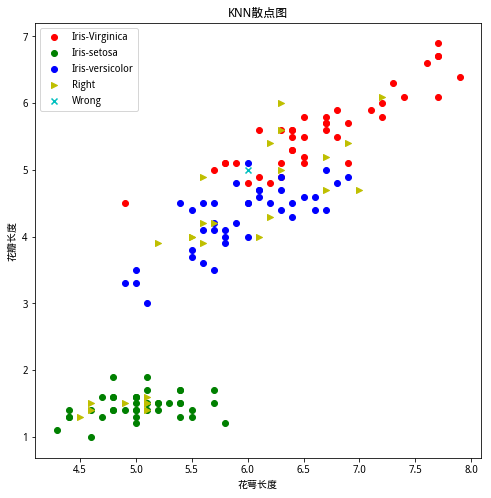

In [62]:
plt.figure(figsize=[8,8])
plt.scatter(x=t0["SepalLengthCm"][:40], y=t0["PetalLengthCm"][:40], color='r', label="Iris-Virginica")
plt.scatter(x=t1["SepalLengthCm"][:40], y=t1["PetalLengthCm"][:40], color='g', label="Iris-setosa")
plt.scatter(x=t2["SepalLengthCm"][:40], y=t2["PetalLengthCm"][:40], color='b', label="Iris-versicolor")
#绘制测试集数据
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["SepalLengthCm"], y=right["PetalLengthCm"], color='y', label="Right", marker=">")
plt.scatter(x=wrong["SepalLengthCm"], y=wrong["PetalLengthCm"], color='c', label="Wrong", marker="x")
plt.xlabel("花萼长度")
plt.ylabel("花瓣长度")
plt.title("KNN散点图")
plt.legend(loc="best")
plt.show()